In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [ ]:
train[]

In [4]:
train.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


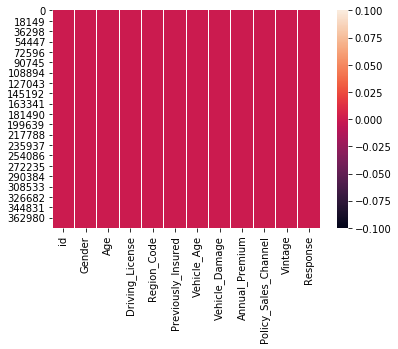

In [8]:
sns.heatmap(train.isnull())

In [19]:
train.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   id                    381109 non-null  bool 
 1   Gender                381109 non-null  bool 
 2   Age                   381109 non-null  bool 
 3   Driving_License       381109 non-null  bool 
 4   Region_Code           381109 non-null  bool 
 5   Previously_Insured    381109 non-null  bool 
 6   Vehicle_Age           381109 non-null  bool 
 7   Vehicle_Damage        381109 non-null  bool 
 8   Annual_Premium        381109 non-null  bool 
 9   Policy_Sales_Channel  381109 non-null  bool 
 10  Vintage               381109 non-null  bool 
 11  Response              381109 non-null  bool 
dtypes: bool(12)
memory usage: 4.4 MB


In [20]:
train['Region_Code']

0         28.0
1          3.0
2         28.0
3         11.0
4         41.0
          ... 
381104    26.0
381105    37.0
381106    30.0
381107    14.0
381108    29.0
Name: Region_Code, Length: 381109, dtype: float64

In [28]:
train['Vehicle_Damage']

0         Yes
1          No
2         Yes
3          No
4          No
         ... 
381104     No
381105     No
381106     No
381107    Yes
381108     No
Name: Vehicle_Damage, Length: 381109, dtype: object

In [29]:
damage = pd.get_dummies(train['Vehicle_Damage'],drop_first=True)

In [30]:
damage

,Yes
0,1
1,0
2,1
3,0
4,0
...,...
381104,0
381105,0
381106,0
381107,1


In [31]:
train = pd.concat([train,damage],axis =1)

In [34]:
train = train.drop('Vehicle_Damage',axis =1)

In [35]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Yes
0,1,Male,44,1,28.0,0,> 2 Years,40454.0,26.0,217,1,1
1,2,Male,76,1,3.0,0,1-2 Year,33536.0,26.0,183,0,0
2,3,Male,47,1,28.0,0,> 2 Years,38294.0,26.0,27,1,1
3,4,Male,21,1,11.0,1,< 1 Year,28619.0,152.0,203,0,0
4,5,Female,29,1,41.0,1,< 1 Year,27496.0,152.0,39,0,0


In [38]:
train['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [51]:
def V_Age(Vehicle_Age):
    if Vehicle_Age == '> 2 Years':
        return 2
    elif Vehicle_Age == '1-2 Year':
        return 1
    else:
        return 0

In [53]:
train['Vehicle_Age'] = train['Vehicle_Age'].apply(V_Age)

In [67]:
train

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Yes,Male
0,1,44,1,28.0,0,2,40454.0,26.0,217,1,1,1
1,2,76,1,3.0,0,1,33536.0,26.0,183,0,0,1
2,3,47,1,28.0,0,2,38294.0,26.0,27,1,1,1
3,4,21,1,11.0,1,0,28619.0,152.0,203,0,0,1
4,5,29,1,41.0,1,0,27496.0,152.0,39,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,1,30170.0,26.0,88,0,0,1
381105,381106,30,1,37.0,1,0,40016.0,152.0,131,0,0,1
381106,381107,21,1,30.0,1,0,35118.0,160.0,161,0,0,1
381107,381108,68,1,14.0,0,2,44617.0,124.0,74,0,1,0


In [61]:
G = pd.get_dummies(train['Gender'],drop_first=True)

In [62]:
G

,Male
0,1
1,1
2,1
3,1
4,0
...,...
381104,1
381105,1
381106,1
381107,0


In [66]:
train = train.drop('Gender',axis = 1)

In [64]:
train = pd.concat([train,G],axis=1)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr = LogisticRegression(max_iter=1000)

In [70]:
X_train = train.drop('Response',axis=1)

In [90]:
X_train

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Yes,Male
0,1,44,1,28.0,0,2,40454.0,26.0,217,1,1
1,2,76,1,3.0,0,1,33536.0,26.0,183,0,1
2,3,47,1,28.0,0,2,38294.0,26.0,27,1,1
3,4,21,1,11.0,1,0,28619.0,152.0,203,0,1
4,5,29,1,41.0,1,0,27496.0,152.0,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,1,30170.0,26.0,88,0,1
381105,381106,30,1,37.0,1,0,40016.0,152.0,131,0,1
381106,381107,21,1,30.0,1,0,35118.0,160.0,161,0,1
381107,381108,68,1,14.0,0,2,44617.0,124.0,74,1,0


In [72]:
y_train = train['Response']

In [73]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
test1 = pd.read_csv('test.csv')

In [89]:
test1

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Yes,Male
0,381110,25,1,11.0,1,0,35786.0,152.0,53,0,1
1,381111,40,1,28.0,0,1,33762.0,7.0,111,1,1
2,381112,47,1,28.0,0,1,40050.0,124.0,199,1,1
3,381113,24,1,27.0,1,0,37356.0,152.0,187,1,1
4,381114,27,1,28.0,1,0,59097.0,152.0,297,0,1
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,26,1,37.0,1,0,30867.0,152.0,56,0,0
127033,508143,38,1,28.0,0,1,28700.0,122.0,165,1,0
127034,508144,21,1,46.0,1,0,29802.0,152.0,74,0,1
127035,508145,71,1,28.0,1,1,62875.0,26.0,265,0,1


In [81]:
test1['Vehicle_Age'] = test['Vehicle_Age'].apply(V_Age)

In [83]:
VA = pd.get_dummies(test1['Vehicle_Damage'],drop_first=True)

In [85]:
GN = pd.get_dummies(test1['Gender'],drop_first = True)

In [86]:
test1 = pd.concat([test1,VA,GN],axis = 1)

In [88]:
test1 = test1.drop(['Gender','Vehicle_Damage'],axis=1)

In [91]:
pred = lr.predict(test1)

In [92]:
test1['id']

0         381110
1         381111
2         381112
3         381113
4         381114
           ...  
127032    508142
127033    508143
127034    508144
127035    508145
127036    508146
Name: id, Length: 127037, dtype: int64

In [93]:
Result = pd.DataFrame(pred,test1['id'],columns=['Response'])

In [94]:
Result

,Response
id,
381110,0
381111,0
381112,0
381113,0
381114,0
...,...
508142,0
508143,0
508144,0


In [95]:
Result.to_csv('Result1')

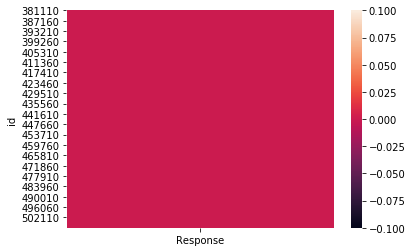

In [96]:
sns.heatmap(Result.isnull())